In [13]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

In [14]:
def func_for_a(func, h: np.float_, x_0: np.float_) -> np.float_:
    return -np.divide(np.float_(-3.0) * func(x_0) + np.float_(4.0) * func(x_0 - h) - func(x_0 + np.float_(-2.0) * h),
                     np.float_(2) * h)

def func_for_b(func, h: np.float_, x_0: np.float_) -> np.float_:
    return np.divide(func(x_0 - h) + np.float_(-2.0) * func(x_0) + func(x_0 + h), np.float_power(h, 2))

def func_for_c(func, h: np.float_, x_0: np.float_) -> np.float_:
    return np.divide(func(x_0 + np.float_(-2.0) * h) + np.float_(8.0) * (func(x_0 + h) - func(x_0 - h)) -
                     func(x_0 + np.float_(2.0) * h), np.float_(12.0) * h)

def func_for_d(func, h: np.float_, x_0: np.float_) -> np.float_:
    return np.divide(np.float_(-1) * func(x_0 + np.float_(-2.0) * h) + np.float_(16.0) * (func(x_0 + h) + func(x_0 - h))
                     - func(x_0 + np.float_(2.0) * h) + np.float_(-30.0) * func(x_0),
                     np.float_(12.0) * np.float_power(h,2))

In [15]:
func = lambda x: np.exp((np.float_(2.0) * x))
x_0 = np.float_(0.0)
h = np.float_(0.00001)

func_for_a(func, h, x_0)

1.9999999997355464

In [16]:
start = np.float_power(np.float_(10), np.float_(-8))
stop = np.float_(0.1)
h = np.arange(start, stop, np.divide(stop - start, np.float_(10**7)))
nu = np.full_like(h, dtype=np.float_, fill_value=(np.divide(np.float_(2.2),
                                                            np.float_power(np.float_(10), np.float_(16)))))
# ideal_roundoff_error = np.divide(nu, h)

In [17]:
second_deriv_at_zero = np.full_like(h, dtype=np.float_, fill_value=np.float_(4))
first_deriv_at_zero = np.full_like(h, dtype=np.float_, fill_value=np.float_(2))

In [18]:
x_zeros = np.full_like(h, dtype=np.float_, fill_value=np.float_(0.0))

numerical_derivative = func_for_a(func, h, x_zeros)
a_measured_error = np.abs(first_deriv_at_zero - numerical_derivative)

numerical_derivative = func_for_b(func, h, x_zeros)
b_measured_error = np.abs(second_deriv_at_zero - numerical_derivative)

numerical_derivative = func_for_c(func, h, x_zeros)
c_measured_error = np.abs(first_deriv_at_zero - numerical_derivative)

numerical_derivative = func_for_d(func, h, x_zeros)
d_measured_error = np.abs(second_deriv_at_zero - numerical_derivative)



In [19]:
## using the midpoint of the interval on which the truncation error is defined

# h_to_four_times_one = np.float_power(h, 4) * np.float_(1)
a_ideal_trunc_error = np.abs(np.divide(np.float_power(h, 2) * np.exp(np.float_(-2) * h) * np.float_(8), np.float_(3.0)))
b_ideal_trunc_error = np.abs(np.divide(np.float_power(h, 2) * np.float_(-1) * np.float_(16), np.float_(12.0)))
c_ideal_trunc_error = np.abs(np.divide(np.float_power(h, 4) * np.float_(1) * np.float_(32), np.float_(30.0)))
d_ideal_trunc_error = np.abs(np.divide(np.float_power(h, 4) * np.float_(1) * np.float_(16), np.float_(90.0)))


In [20]:
ideal_label = 'Ideal Roundoff Error'
trunc_label = 'Ideal Truncation Error'
measure_label = 'Measured Error'
ideal_roundoff_error = np.divide(nu, h)
schemes = ['A', 'B', 'C', 'D']
measured_error = [a_measured_error, b_measured_error, c_measured_error, d_measured_error]
trunc_error = [a_ideal_trunc_error, b_ideal_trunc_error, c_ideal_trunc_error, d_ideal_trunc_error]

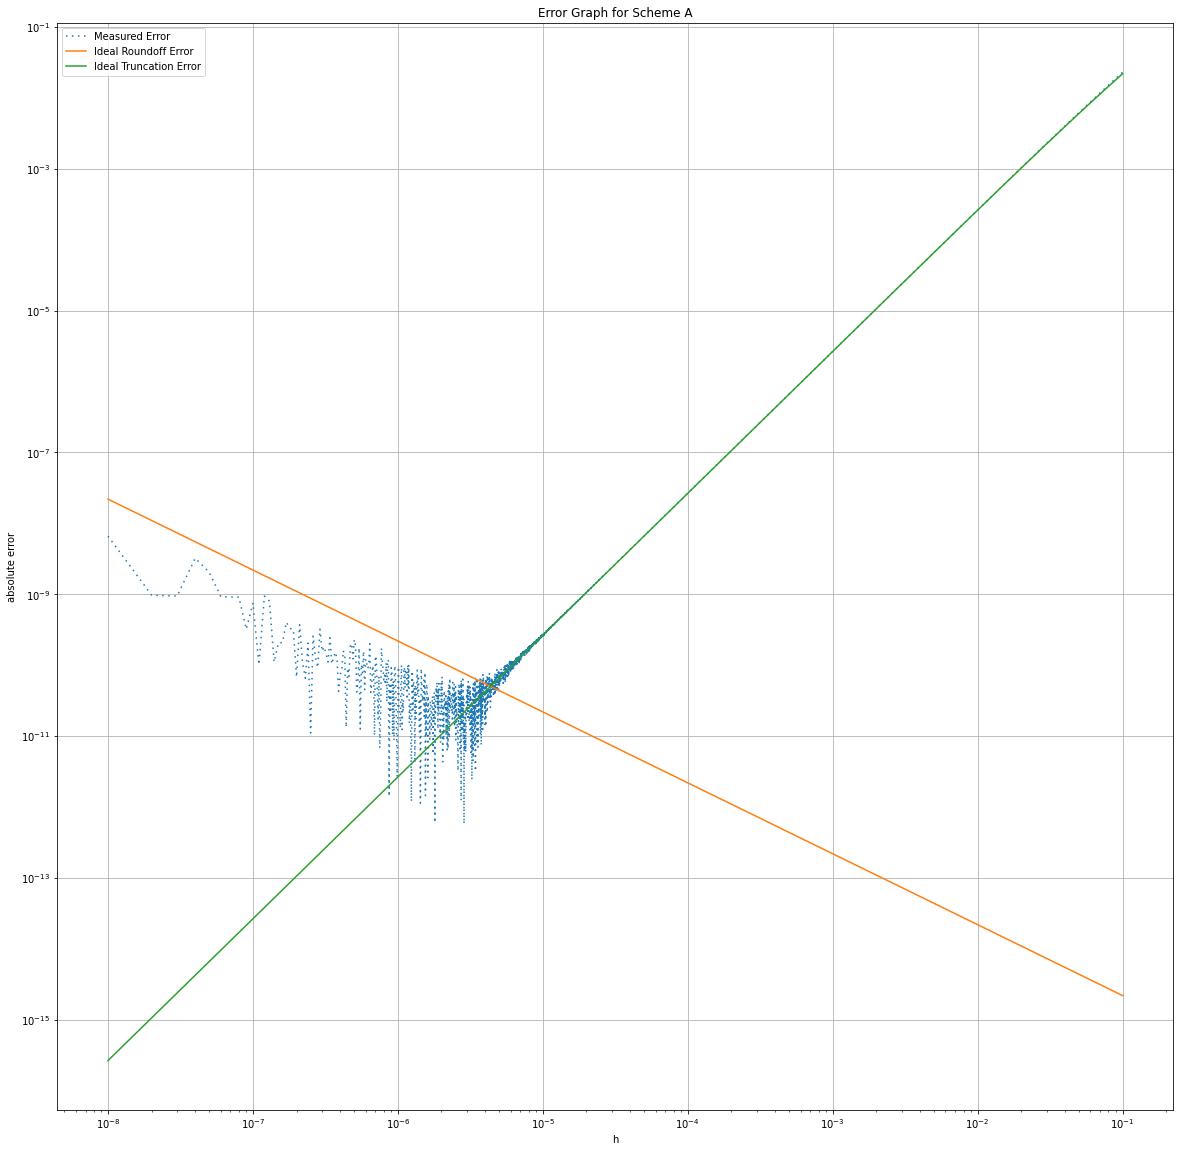

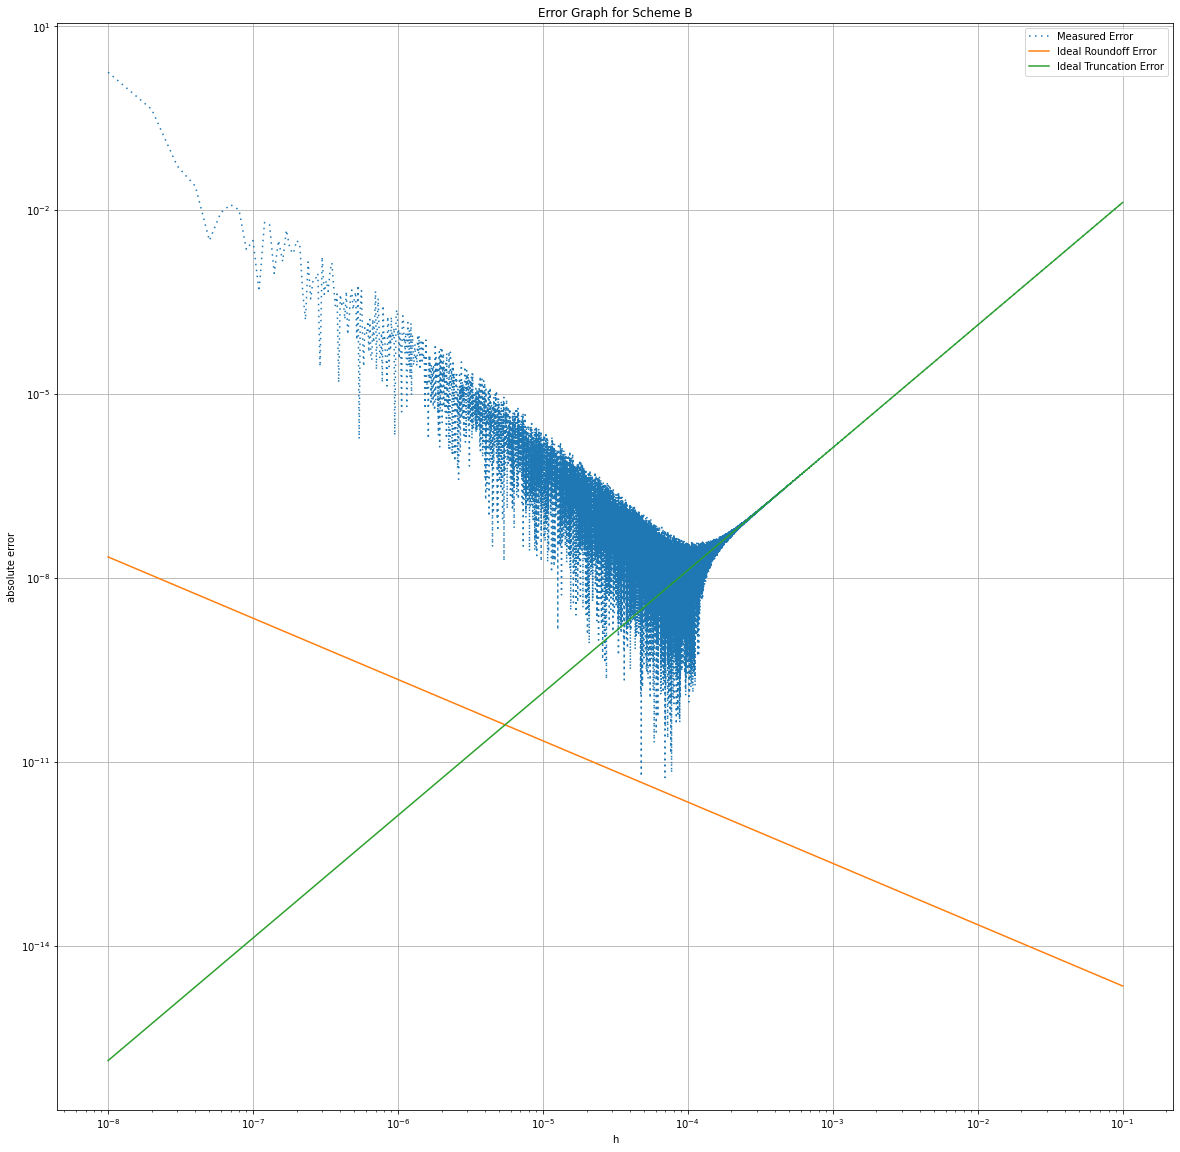

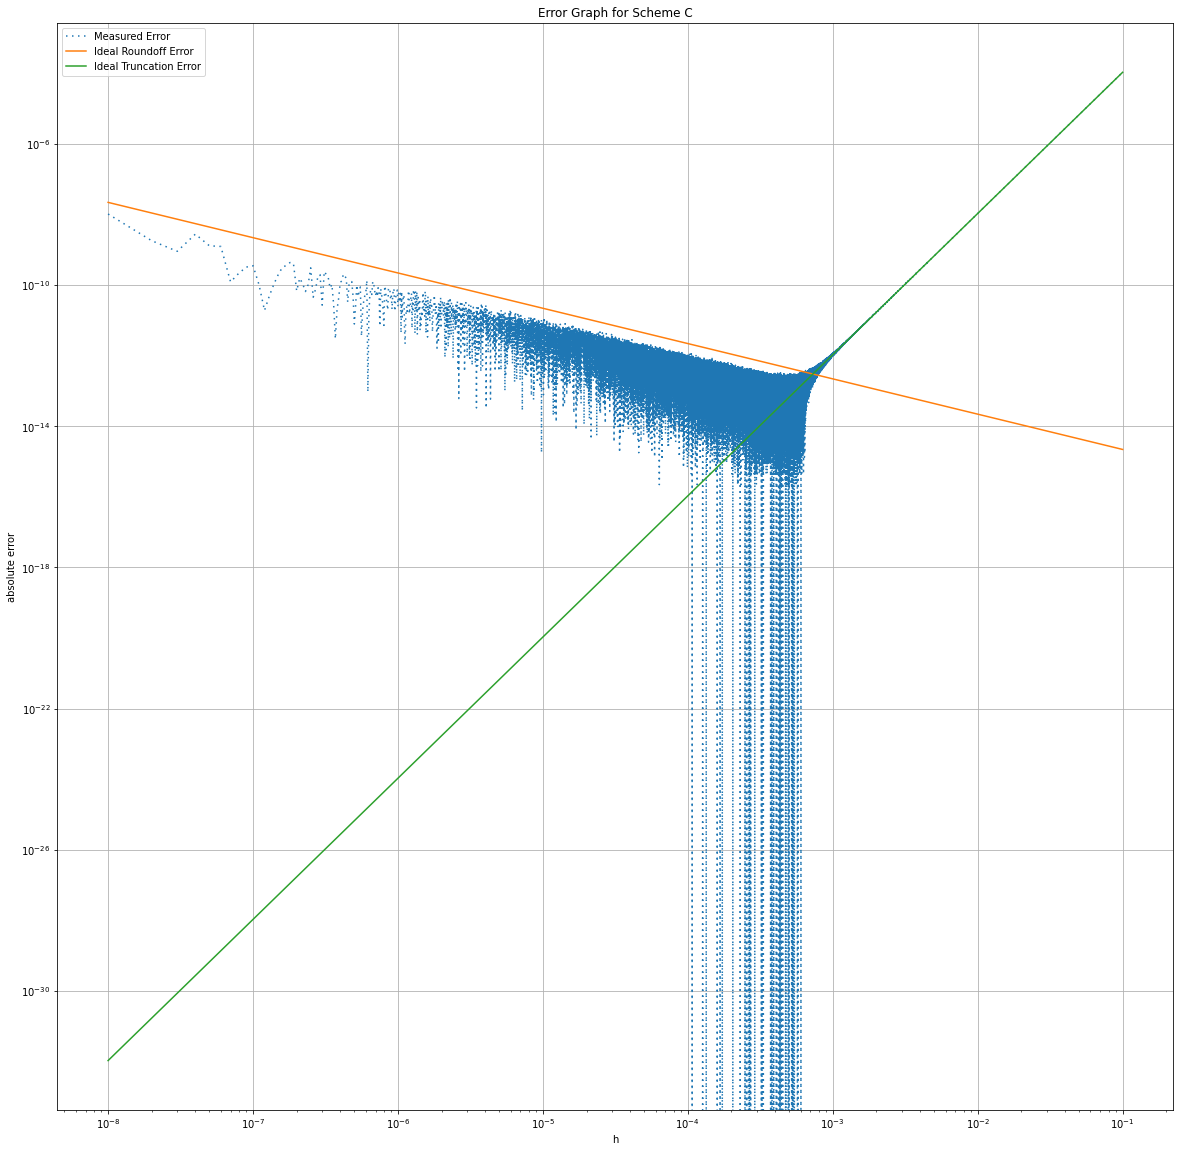

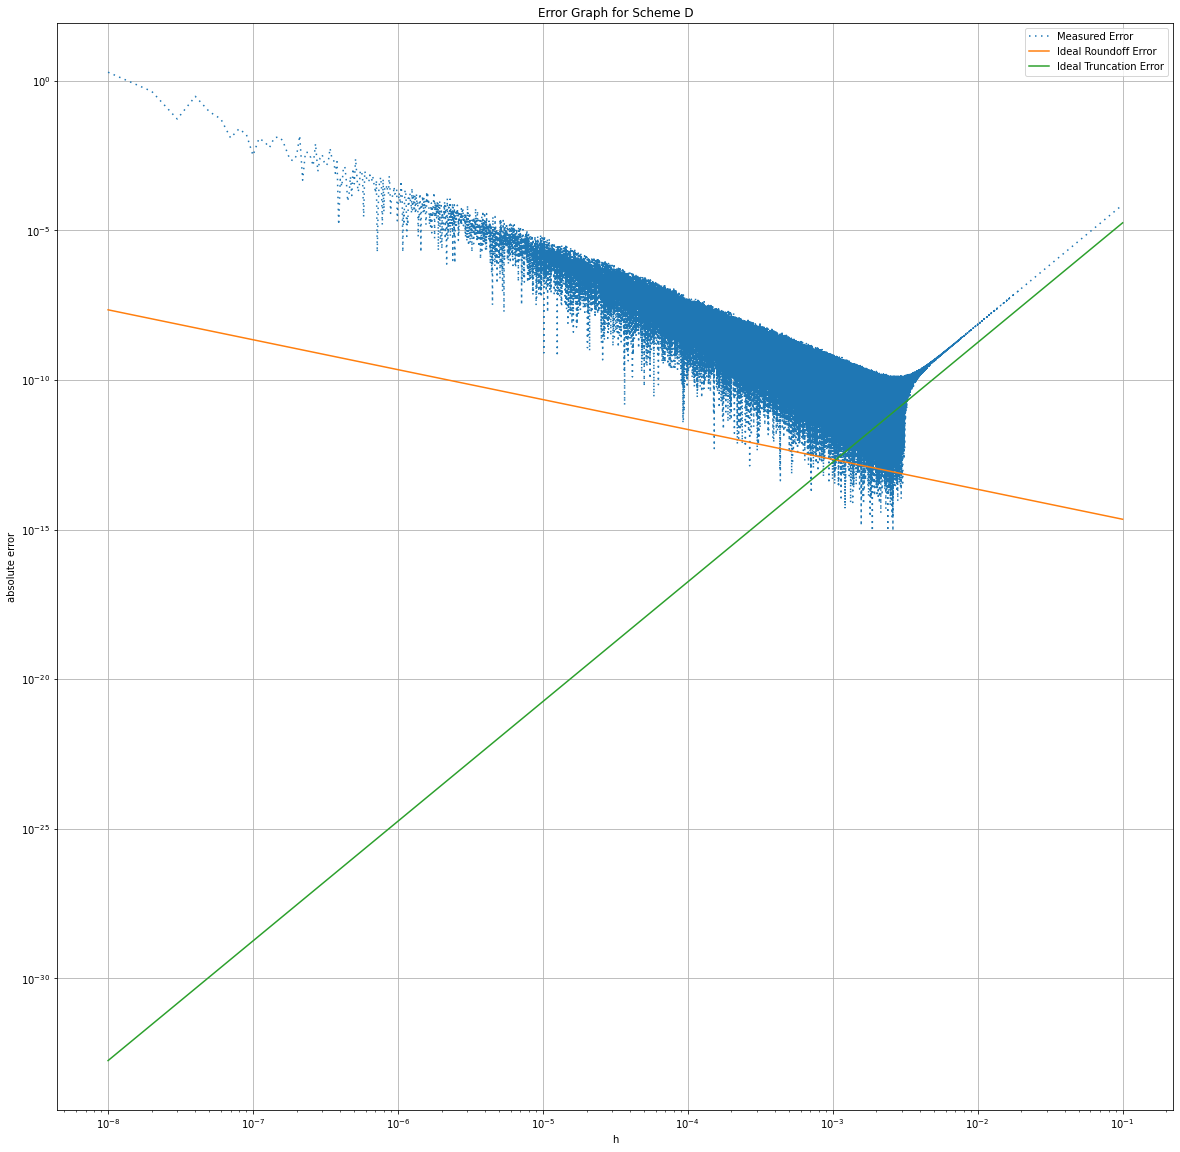

In [21]:
for idx, scheme in enumerate(schemes):
    plt.figure(figsize=(20,20))
    title = 'Error Graph for Scheme ' + scheme
    plt.title(title)
    plt.ylabel('absolute error')
    plt.xlabel('h')
    plt.loglog(h, measured_error[idx], linestyle=(0,(1,3)), label=measure_label)
    plt.loglog(h, ideal_roundoff_error, label=ideal_label)
    plt.loglog(h, trunc_error[idx], label=trunc_label)
    plt.grid()
    plt.legend()
    plt.show()


In [22]:
ideal_roundoff_error = np.divide(nu, np.float_power(h, 2))

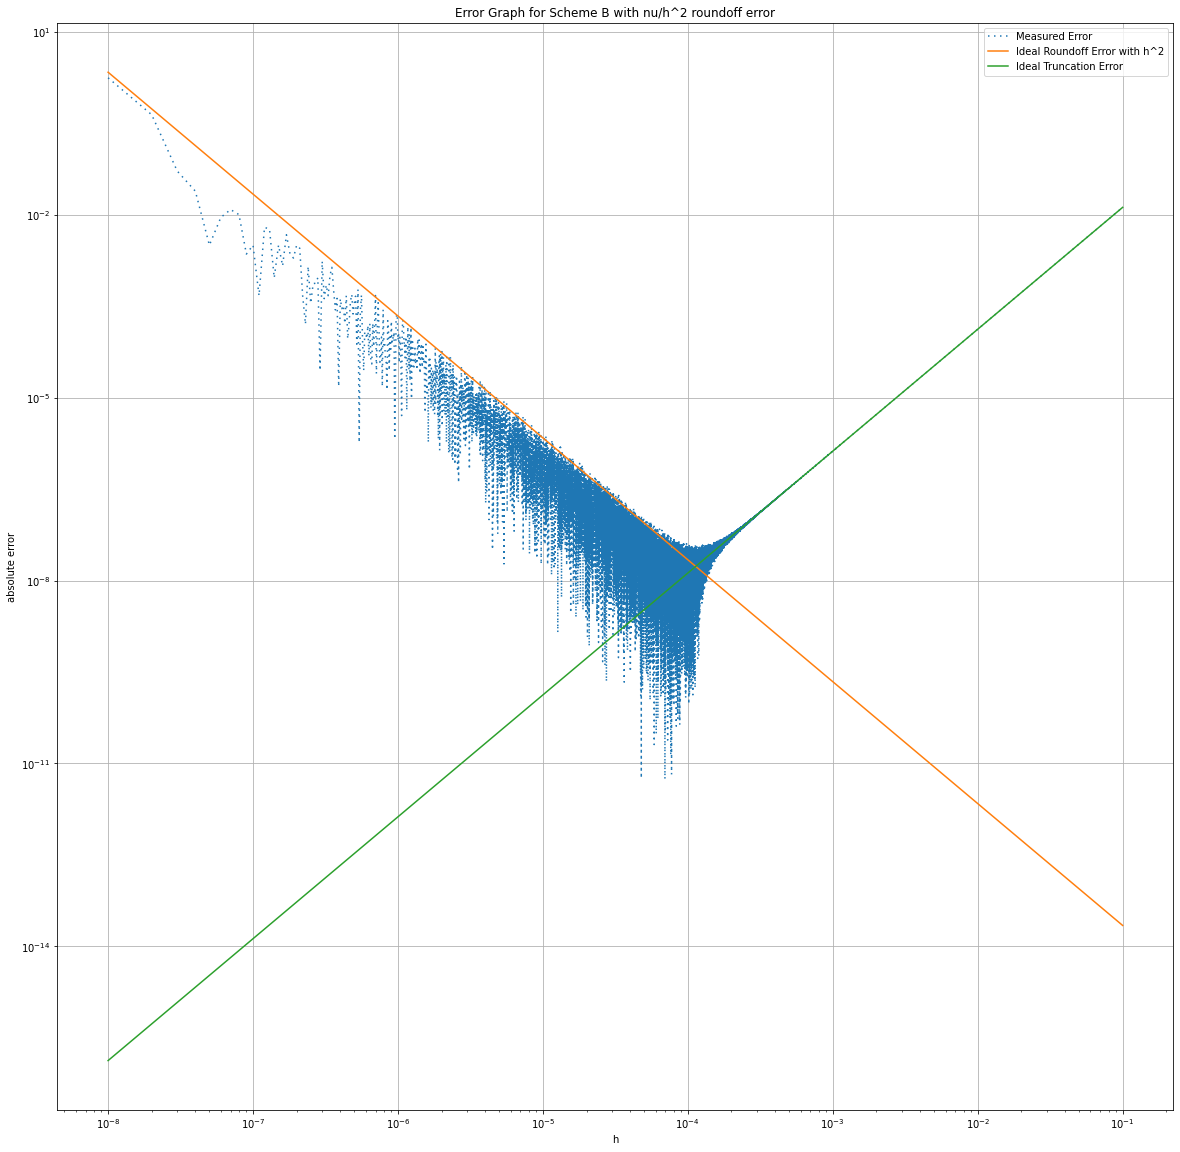

In [23]:
plt.figure(figsize=(20,20))
title = 'Error Graph for Scheme B with nu/h^2 roundoff error'
plt.title(title)
plt.ylabel('absolute error')
plt.xlabel('h')
plt.loglog(h, b_measured_error, linestyle=(0,(1,3)), label=measure_label)
plt.loglog(h, ideal_roundoff_error, label='Ideal Roundoff Error with h^2')
plt.loglog(h, b_ideal_trunc_error, label=trunc_label)
plt.grid()
plt.legend()


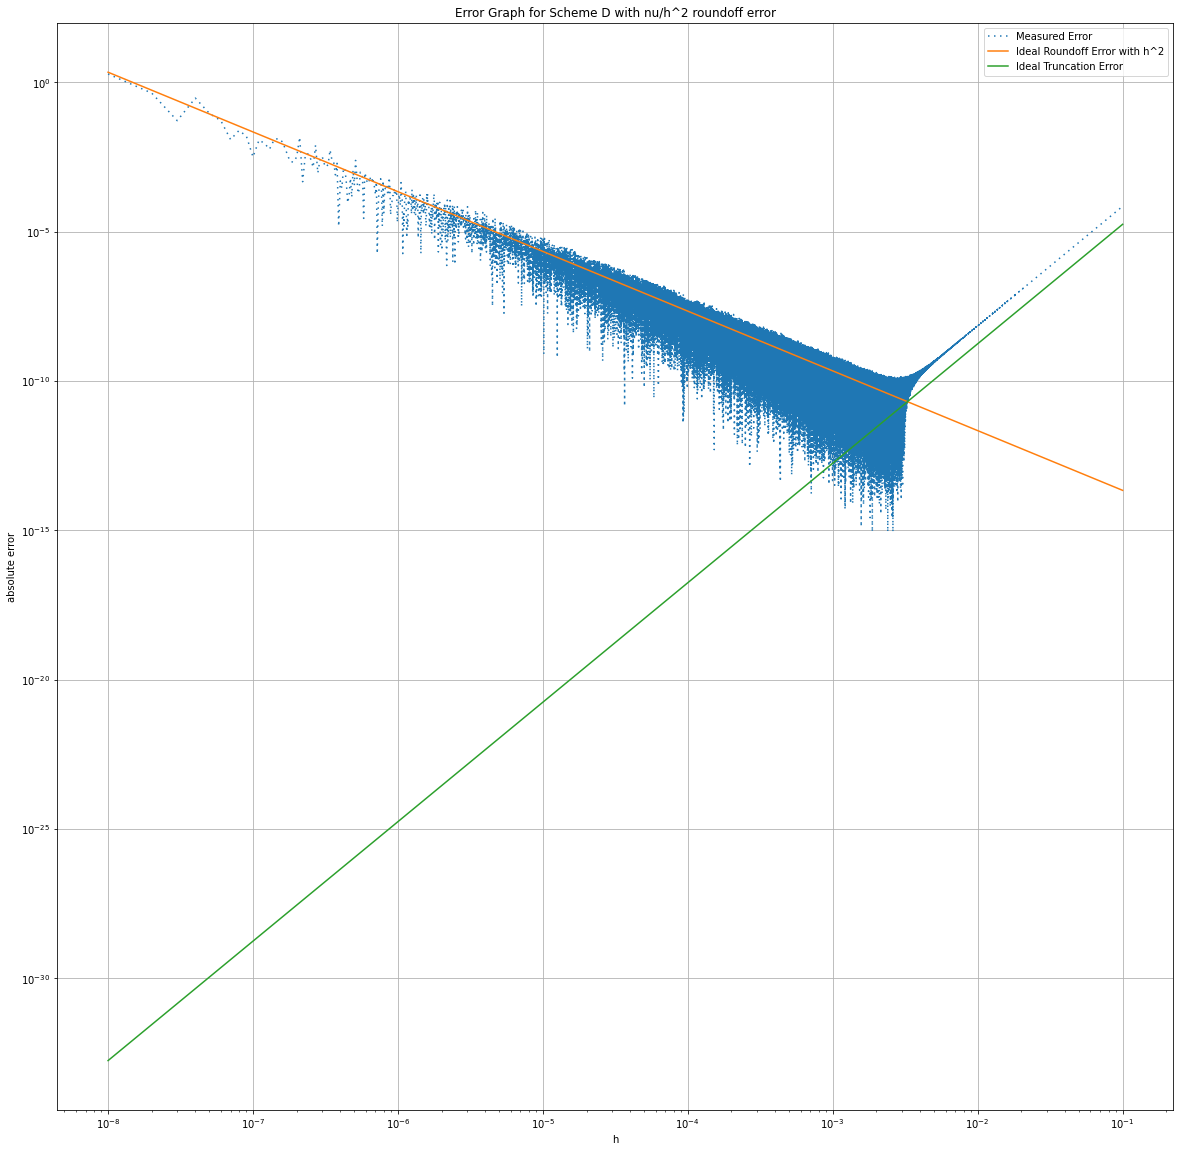

In [24]:
plt.figure(figsize=(20,20))
title = 'Error Graph for Scheme D with nu/h^2 roundoff error'
plt.title(title)
plt.ylabel('absolute error')
plt.xlabel('h')
plt.loglog(h, d_measured_error, linestyle=(0,(1,3)), label=measure_label)
plt.loglog(h, ideal_roundoff_error, label='Ideal Roundoff Error with h^2')
plt.loglog(h, d_ideal_trunc_error, label='Ideal Truncation Error')
plt.grid()
plt.legend()